### Import Libraries

In [2]:
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

### Load Audios

In [3]:
claps_file = "./audio/test.wav"
claps, sr = librosa.load(claps_file)

# ipd.Audio(claps_file)

### Extracting Short-Time Fourier Transform

In [4]:
FRAME_SIZE = 2048
HOP_SIZE = 512

S_claps = librosa.stft(claps, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
print(f"Size of S_claps: {S_claps.shape}")
print(f"Type of S_claps: {type(S_claps[0][0])}")


Size of S_claps: (1025, 216)
Type of S_claps: <class 'numpy.complex64'>


### Calculating the Spectrogram

In [5]:
Y_claps = np.abs(S_claps) ** 2

print(f"Size of Y_claps: {Y_claps.shape}")
print(f"Type of Y_claps: {type(Y_claps[0][0])}")

Size of Y_claps: (1025, 216)
Type of Y_claps: <class 'numpy.float32'>


### Visualising the Spectrogram

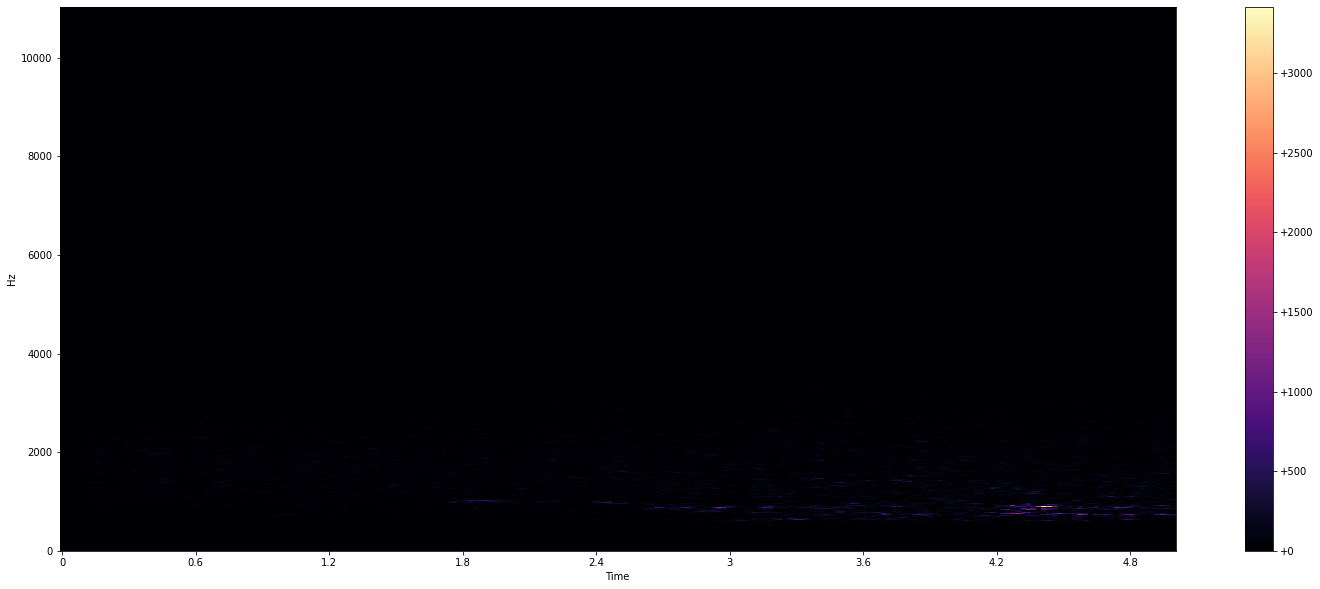

In [6]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(Y_claps,
                         sr=sr,
                         hop_length=HOP_SIZE,
                         x_axis="time",
                         y_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

### Log-Amplitude Spectrogram

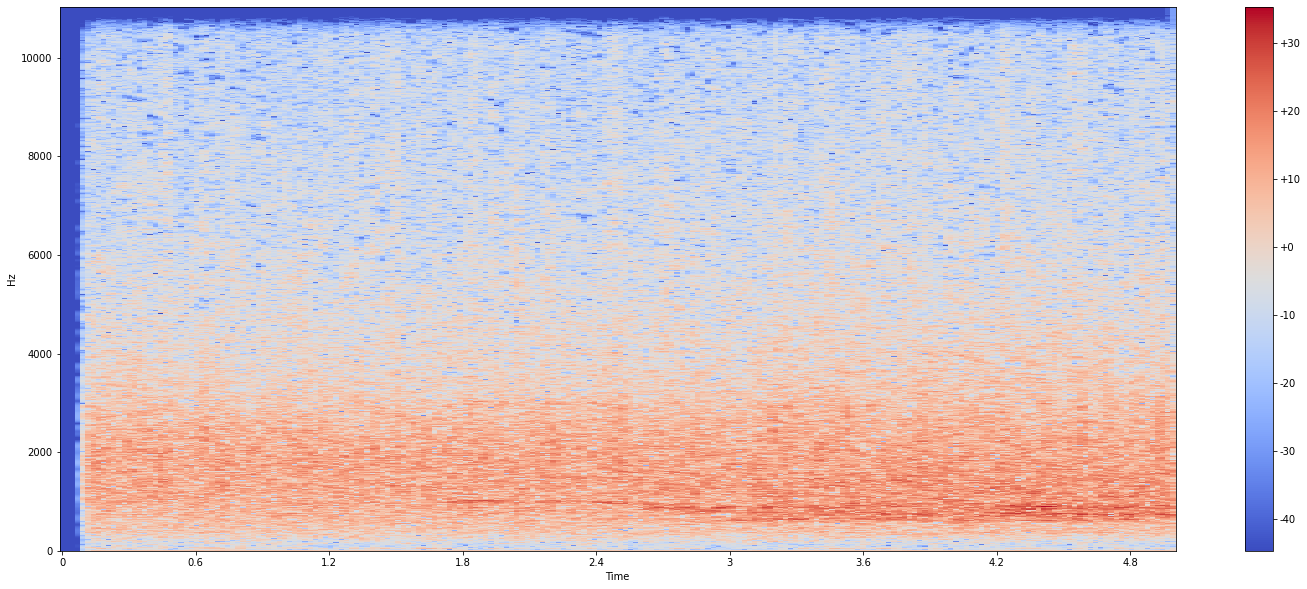

In [7]:
Y_logscale_claps = librosa.power_to_db(Y_claps)

plt.figure(figsize=(25, 10))
librosa.display.specshow(data=Y_logscale_claps,
                         hop_length=HOP_SIZE,
                         sr=sr,
                         x_axis="time",
                         y_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

### Log-Frequency Spectrogram

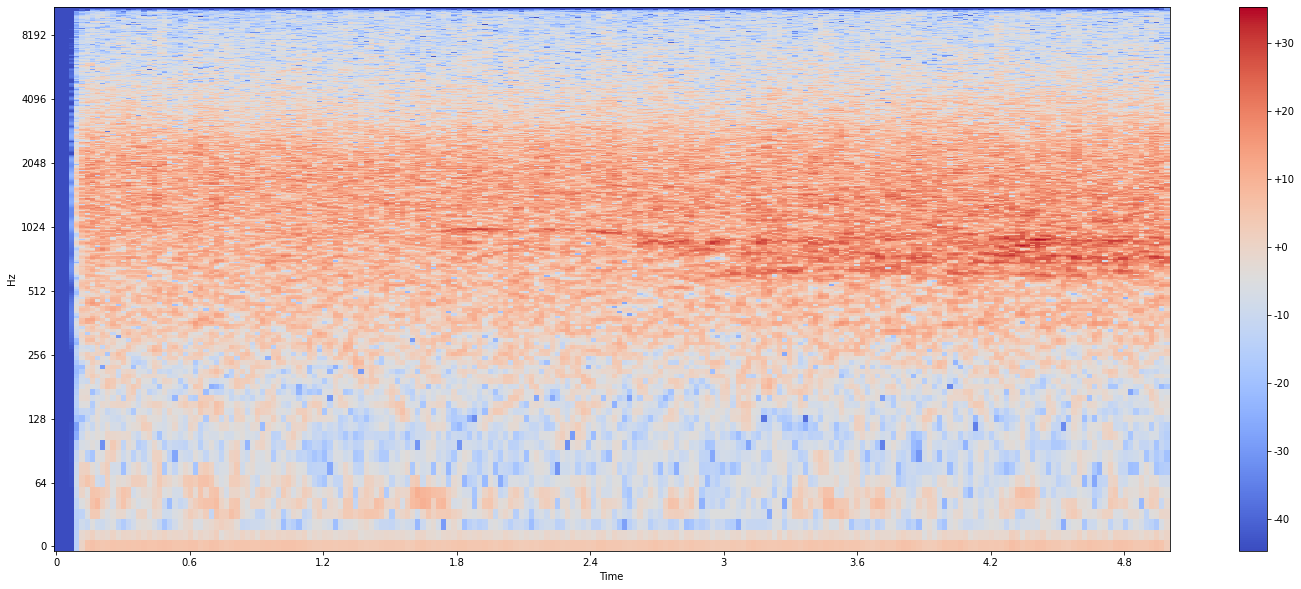

In [8]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(data=Y_logscale_claps,
                         sr=sr,
                         hop_length=HOP_SIZE,
                         x_axis="time",
                         y_axis="log")
plt.colorbar(format="%+2.f")
plt.show()